In [ ]:
"""
-- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class has been used for image classification project
-- Convolutional neural network (CNN) and data agumentaion has been tested for image classification
-- Transfer learning with ResNet50 model has been used for image classification
-- Transfer learning with MobileNetV2 model has been used for image classification
-- ResNet50 vs  MobileNetV2:
ResNet50 has about 25 million parameters with complex Residual connections (or skip connections), more accuracy and computation
MobileNetV2 has about 3.4 million parameters, depthwise separable convolutions and inverted residuals, efficient model optimized for mobile and embedded systems,
"""

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.applications.resnet50 import ResNet50

2024-09-02 15:13:46.160872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.cifar10.load_data()

In [4]:
xtrain=xtrain/255
xtest=xtest/255

truck


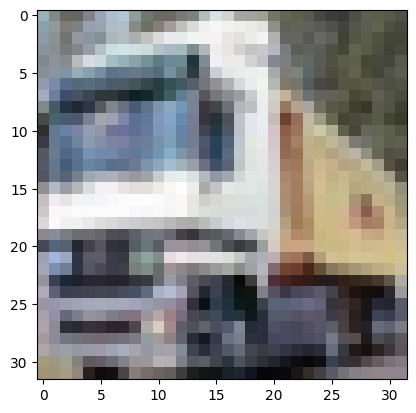

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(xtrain[1])
print(classes[ytrain[1][0]])

# Use Convolutional neural network (CNN) and data agumentaion for image classification

In [90]:
data_agumentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    
])

In [9]:
model=keras.Sequential([
    data_agumentation,    
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)), 
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),
  
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [10]:
model.fit(xtrain,ytrain, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 25ms/step - loss: 2.1509 - accuracy: 0.3020
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5620 - accuracy: 0.4354
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4662 - accuracy: 0.4744
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4036 - accuracy: 0.4984
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.3477 - accuracy: 0.5239
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.3107 - accuracy: 0.5365
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2738 - accuracy: 0.5506
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2520 - accuracy: 0.5621
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2248 - accuracy: 0.5696
Epoch 10/10
1563/1563 [==============================] - 41s 27m

In [11]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 2s 6ms/step - loss: 1.1514 - accuracy: 0.6071


[1.15139901638031, 0.6071000099182129]

313/313 [==============================] - 2s 5ms/step


<Axes: >

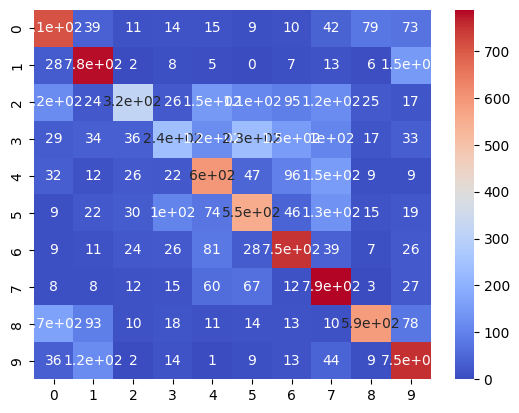

In [12]:
ypred=model.predict(xtest)
ypred=[np.argmax(i) for i in ypred]
cm=tf.math.confusion_matrix(ytest,ypred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [14]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1000
           1       0.68      0.78      0.73      1000
           2       0.68      0.32      0.43      1000
           3       0.49      0.24      0.32      1000
           4       0.54      0.59      0.56      1000
           5       0.52      0.55      0.53      1000
           6       0.63      0.75      0.68      1000
           7       0.55      0.79      0.65      1000
           8       0.78      0.59      0.67      1000
           9       0.64      0.75      0.69      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.59     10000
weighted avg       0.61      0.61      0.59     10000



# Transfer Learning of image calssification with ResNet50 model

In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
base_model.summary()

In [49]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

def ResNet_model():
    inputs = tf.keras.layers.Input(shape=(32,32,3))
    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)
    x = base_model(resize, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    output = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    model = tf.keras.Model(inputs=inputs, outputs = output)
     
    model.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
    return model

In [50]:
model=ResNet_model()
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_9 (UpSamplin  (None, 224, 224, 3)       0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_7  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)              2098

In [43]:
model.fit(xtrain,ytrain, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 3252s 2s/step - loss: 0.9228 - accuracy: 0.6730
Epoch 2/3
1563/1563 [==============================] - 3160s 2s/step - loss: 0.6854 - accuracy: 0.7570
Epoch 3/3
1563/1563 [==============================] - 3283s 2s/step - loss: 0.6067 - accuracy: 0.7862


In [44]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 657s 2s/step - loss: 0.7480 - accuracy: 0.7390


[0.7480339407920837, 0.7390000224113464]

313/313 [==============================] - 709s 2s/step


<Axes: >

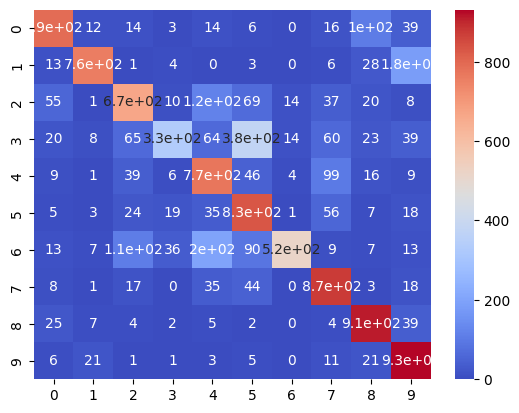

In [45]:
ypred=model.predict(xtest)
ypred=[np.argmax(i) for i in ypred]
cm=tf.math.confusion_matrix(ytest,ypred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [46]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1000
           1       0.93      0.76      0.83      1000
           2       0.71      0.67      0.69      1000
           3       0.80      0.33      0.47      1000
           4       0.62      0.77      0.69      1000
           5       0.57      0.83      0.67      1000
           6       0.94      0.52      0.67      1000
           7       0.75      0.87      0.80      1000
           8       0.80      0.91      0.85      1000
           9       0.72      0.93      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.77      0.74      0.73     10000
weighted avg       0.77      0.74      0.73     10000



# Transfer Learning of image calssification with MobileNet model

In [120]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(96,96,3),
                                                   include_top=False,
                                                   weights='imagenet')
base_model.trainable = False 
base_model.summary() 

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_77 (InputLayer)       [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 48, 48, 32)           864       ['input_77[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 48, 48, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 48, 48, 32)           0         ['bn_Conv1[0

In [117]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(96,96,3),
                                                   include_top=False,
                                                   weights='imagenet')
base_model.trainable = False                                             

def MobileNet_model():
    inputs = tf.keras.Input(shape=(32,32,3))
    resize = tf.keras.layers.UpSampling2D(size=(3,3))(inputs) 
    x = data_agumentation(resize)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x) 
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    output = tf.keras.layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs = output)
     
    model.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
    return model

9406464/9406464 [==============================] - 1s 0us/step


In [118]:
model=MobileNet_model()
model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_76 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_12 (UpSampli  (None, 96, 96, 3)         0         
 ng2D)                                                           
                                                                 
 sequential_8 (Sequential)   (None, None, None, 3)     0         
                                                                 
 tf.math.truediv_15 (TFOpLa  (None, 96, 96, 3)         0         
 mbda)                                                           
                                                                 
 tf.math.subtract_15 (TFOpL  (None, 96, 96, 3)         0         
 ambda)                                                          
                                                          

In [119]:
model.fit(xtrain,ytrain, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 274s 173ms/step - loss: 0.9468 - accuracy: 0.6751
Epoch 2/3
1563/1563 [==============================] - 257s 165ms/step - loss: 0.7757 - accuracy: 0.7308
Epoch 3/3
1563/1563 [==============================] - 253s 162ms/step - loss: 0.7325 - accuracy: 0.7458


In [121]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 48s 152ms/step - loss: 1.1389 - accuracy: 0.6097


[1.138868808746338, 0.6097000241279602]

313/313 [==============================] - 50s 157ms/step


<Axes: >

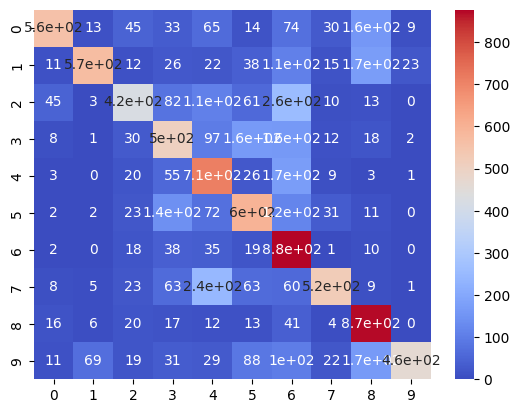

In [136]:
ypred=model.predict(xtest)
ypred=[np.argmax(i) for i in ypred]
cm=tf.math.confusion_matrix(ytest,ypred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [137]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67      1000
           1       0.85      0.57      0.68      1000
           2       0.67      0.42      0.52      1000
           3       0.51      0.51      0.51      1000
           4       0.51      0.71      0.59      1000
           5       0.55      0.60      0.57      1000
           6       0.45      0.88      0.59      1000
           7       0.80      0.52      0.63      1000
           8       0.61      0.87      0.71      1000
           9       0.93      0.46      0.62      1000

    accuracy                           0.61     10000
   macro avg       0.67      0.61      0.61     10000
weighted avg       0.67      0.61      0.61     10000

